In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
dataset2 = pd.read_excel("Data.xlsx")
data = pd.DataFrame(dataset2)
data = data.drop(data.columns[0], axis = 1)

In [4]:
data = data.replace("高钾",0)
data = data.replace("铅钡",1)
data = data.replace("无风化",0)
data = data.replace("风化",1)

In [5]:
x1 = data.drop(data.columns[0:2], axis = 1)
x1 = x1.drop(x1.columns[1:4], axis = 1)

In [6]:
x_data = data.drop(data.columns[0:2], axis = 1)
x_data = x_data.drop(x_data.columns[1:4], axis = 1)
for i in list(x_data.columns):
   # 获取各个指标的最大值和最小值
    Max = np.max(x_data[i])
    Min = np.min(x_data[i])
    x_data[i] = (x_data[i] - Min)/(Max - Min)
y_data = data["表面风化"]
X_train,X_test,y_train,y_test = train_test_split(x_data,y_data,random_state=1)

In [7]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression ()
lr.fit(X_train,y_train)
lr.predict(X_test)

#输出模型系数
print('训练模型自变量参数为：',lr.coef_)
print('训练模型截距为：',lr.intercept_)
#模型评价
print('模型的平均正确率为：',lr.score(X_test,y_test))

#看下预测精度
from sklearn.metrics import accuracy_score
y_predict=lr.predict(X_test)
accuracy_score(y_test,y_predict)

训练模型自变量参数为： [[ 0.28394267 -0.04378454  0.14468571 -1.67314725 -0.20929871 -0.15411184
   0.07913924 -0.78466311 -0.20708309  0.76404551 -0.29255039  0.63508808
  -0.21084149 -0.20676504  0.09879845]]
训练模型截距为： [0.5659789]
模型的平均正确率为： 0.7058823529411765


0.7058823529411765

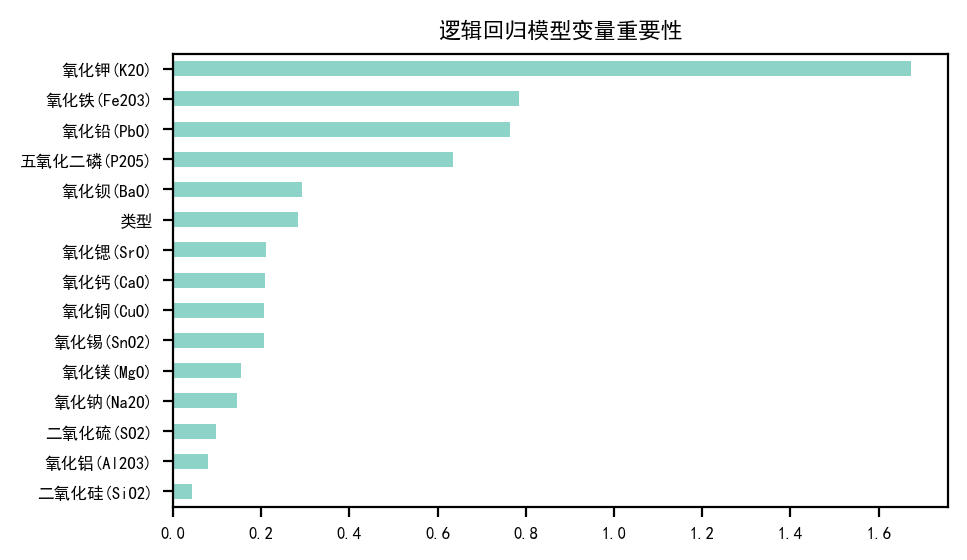

In [30]:

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决无法显示符号的问题

# 1、简单排序,正负分开按顺序
coef_LR = pd.Series(abs(lr.coef_.flatten()),index = X_test.columns,name = 'Var')

#绘图参数设置   
fig = plt.figure(dpi=200,figsize=(5,3)) #设置分辨率，画布大小
ax = fig.add_subplot(111)
#设置背景色
ax.patch.set_facecolor('white')#设置画布外颜色
fig.patch.set_facecolor('white')#设置画布内颜色
#设置画框的颜色
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')

coef_LR.sort_values().plot(kind='barh')
#设置横纵坐标轴的颜色
plt.title("逻辑回归模型变量重要性",color = 'black',fontsize = 8)
plt.tick_params(axis='x',colors='black',labelsize =6)
plt.tick_params(axis='y',colors='black',labelsize =6)



Text(0.5, 1.0, 'Variances Importances')

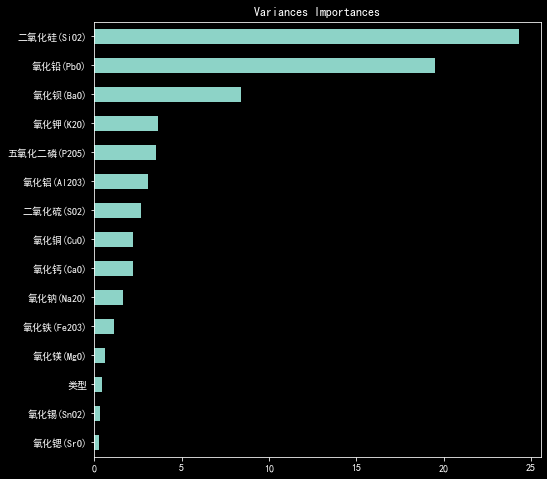

In [32]:
x_descrbie = x1.describe()

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决无法显示符号的问题

# 1、简单排序,正负分开按顺序
std_1 = pd.Series(x_descrbie.iloc[2],name = 'Var')

plt.figure(figsize=(8,8))
std_1.sort_values().plot(kind='barh')
plt.title("Variances Importances")

In [7]:
x1_fh = x1[x1["类型"] == 1]
x1_wfh = x1[x1["类型"] == 0]

In [ ]:
#x1_fh.describe().to_excel("风化特征分布.xlsx",encoding = "utf-8")

In [ ]:
#x1_wfh.describe().to_excel("无风化特征分布.xlsx",encoding = "utf-8")

In [8]:
data_1 = pd.read_excel("风化数据处理.xlsx")
data_2 = pd.read_excel("无风化数据处理.xlsx")
data_1 = data_1.replace("高钾",0)
data_1 = data_1.replace("铅钡",1)
data_2 = data_2.replace("高钾",0)
data_2 = data_2.replace("铅钡",1)

In [9]:
data_1_x1 = data_2.drop(data_2.columns[9:],axis = 1)

data_2_x1 = data_2.drop(data_2.columns[9:],axis = 1)
data_2_x2 = data_2.drop(data_2.columns[10:],axis = 1)
data_2_x3 = data_2.drop(data_2.columns[11:],axis = 1)
data_2_x4 = data_2.drop(data_2.columns[12:],axis = 1)
data_2_x5 = data_2.drop(data_2.columns[13:],axis = 1)
data_2_x6 = data_2.drop(data_2.columns[14:],axis = 1)


data_2_si02 = pd.DataFrame(data_2["二氧化硅(SiO2)"]).iloc[:,0]
data_2_K2O = pd.DataFrame(data_2["氧化钾(K2O)"]).iloc[:,0]
data_2_Fe2O3 = pd.DataFrame(data_2["氧化铁(Fe2O3)"]).iloc[:,0]
data_2_PbO = pd.DataFrame(data_2["氧化铅(PbO)"]).iloc[:,0]
data_2_BaO = pd.DataFrame(data_2["氧化钡(BaO)"]).iloc[:,0]
data_2_P2O5 = pd.DataFrame(data_2["五氧化二磷(P2O5)"]).iloc[:,0]

In [10]:
# 回归模型性能查看函数
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,accuracy_score,precision_score,recall_score, roc_auc_score
def perfomance_reg(model,x,y,name=None):
    y_predict = model.predict(x)
    check = pd.DataFrame(y)
    check['y_predict'] = y_predict
    check['abs_err'] = abs(check['y_predict'] - check[y.name])
    check['ape'] = check['abs_err'] / check[y.name]
    ape = check['ape'][check['ape']!=np.inf].mean()
    if name:
        print(name,':')
    print(f'均方误差: {mean_squared_error(y,y_predict)}')
    print(f'绝对平均误差: {mean_absolute_error(y,y_predict)}')
    print(f'R平方: {r2_score(y,y_predict)}')
    print(f'平均绝对误差百分比: {ape}')
    print('- - - - - - ')

In [20]:
'''for i in list(data_2_x.columns):
   # 获取各个指标的最大值和最小值
    Max = np.max(data_2_x[i])
    Min = np.min(data_2_x[i])
    data_2_x[i] = (data_2_x[i] - Min)/(Max - Min)
#for i in list(data_2_si02.columns):
   # 获取各个指标的最大值和最小值
    Max = np.max(data_2_si02[i])
    Min = np.min(data_2_si02[i])
    data_2_si02[i] = (data_2_si02[i] - Min)/(Max - Min)'''

In [11]:
#逐步回归1
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import r2_score

model_sio2=LR().fit(data_2_x1,data_2_si02)

perfomance_reg(model_sio2,data_2_x1,data_2_si02,'训练集')
data1_sio2 = model_sio2.predict(data_1_x1)
data1_sio2 = pd.DataFrame(data1_sio2,columns=['二氧化硅(SiO2)'])
data_1_x2 = pd.concat([data_1_x1,data1_sio2],axis=1)

训练集 :
均方误差: 64.76963265601744
绝对平均误差: 6.634579517773152
R平方: 0.5899212641533618
平均绝对误差百分比: 0.12282347355480484
- - - - - - 


In [73]:
#逐步回归2
model_K2O=LR().fit(data_2_x2,data_2_K2O)
data1_K2O = model_K2O.predict(data_1_x2)
data1_K2O = pd.DataFrame(data1_K2O,columns=["氧化钾(K2O)"])
data_1_x3 = pd.concat([data_1_x2,data1_K2O],axis=1)

In [74]:
#逐步回归3
model_Fe2O3=LR().fit(data_2_x3,data_2_Fe2O3)
data1_Fe2O3 = model_Fe2O3.predict(data_1_x3)
data1_Fe2O3 = pd.DataFrame(data1_Fe2O3,columns=["氧化铁(Fe2O3)"])
data_1_x4 = pd.concat([data_1_x3,data1_Fe2O3],axis=1)

In [75]:
#逐步回归4
model_PbO=LR().fit(data_2_x4,data_2_PbO)
data1_PbO = model_PbO.predict(data_1_x4)
data1_PbO = pd.DataFrame(data1_PbO,columns=["氧化铅(PbO)"])
data_1_x5 = pd.concat([data_1_x4,data1_PbO],axis=1)

In [76]:
#逐步回归5
model_BaO=LR().fit(data_2_x5,data_2_BaO)
data1_BaO = model_BaO.predict(data_1_x5)
data1_BaO = pd.DataFrame(data1_BaO,columns=["氧化钡(BaO)"])
data_1_x6 = pd.concat([data_1_x5,data1_BaO],axis=1)

In [77]:
#逐步回归6
model_P2O5=LR().fit(data_2_x6,data_2_P2O5)
data1_P2O5 = model_P2O5.predict(data_1_x6)
data1_P2O5 = pd.DataFrame(data1_P2O5,columns=["五氧化二磷(P2O5)"])
data_1_x7 = pd.concat([data_1_x6,data1_P2O5],axis=1)

In [79]:
data_1_x7[data_1_x7<0] = 0

In [80]:
#data_1_x7.to_excel("风化变量预测结果.xlsx")